In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('raw_punks.csv')
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10000 non-null  int64 
 1   types                10000 non-null  object
 2   rarity               10000 non-null  int64 
 3   skin                 10000 non-null  object
 4   total_traits         10000 non-null  int64 
 5   traits               9992 non-null   object
 6   total_hidden_traits  10000 non-null  int64 
 7   hidden_traits        629 non-null    object
dtypes: int64(4), object(4)
memory usage: 625.1+ KB


In [4]:
df1[df1.traits.isnull()]

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
281,281,Male,7,Light,0,NaN,0,NaN
510,510,Male,9,Mid,0,NaN,0,NaN
641,641,Female,6,Light,0,NaN,0,NaN
741,741,Male,5,Dark,0,NaN,0,NaN
1050,1050,Female,8,Mid,0,NaN,0,NaN
2204,2204,Female,4,Dark,0,NaN,0,NaN
3307,3307,Male,3,Albino,0,NaN,0,NaN
6487,6487,Female,2,Albino,0,NaN,0,NaN


In [5]:
df1.fillna('',inplace=True)

In [6]:
df1.head()

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,1,Male,4352,Dark,2,"Mohawk,Smile",0,
2,2,Female,8090,Light,1,Wild Hair,0,
3,3,Male,7896,Dark,3,"Nerd Glasses,Pipe,Wild Hair",0,
4,4,Male,7332,Mid,4,"Big Shades,Earring,Goat,Wild Hair",0,


In [9]:
df_types = df1.groupby('types').count().sort_values(by='id',ascending=False)

In [10]:
df_types

,id,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
types,,,,,,,
Male,6039,6039,6039,6039,6039,6039,6039
Female,3840,3840,3840,3840,3840,3840,3840
Zombie,88,88,88,88,88,88,88
Ape,24,24,24,24,24,24,24
Alien,9,9,9,9,9,9,9


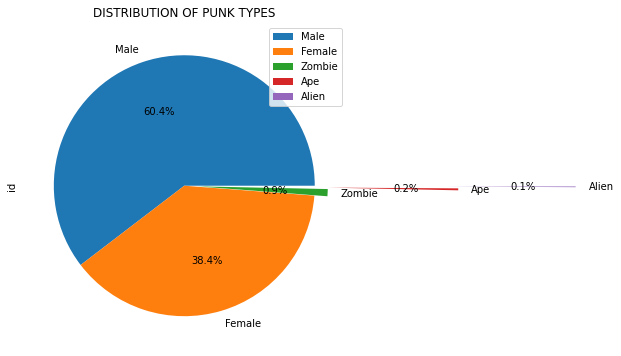

In [11]:
df_types.plot.pie(y='id',figsize=(6,6),explode=(0,0,0.1,1.1,2), 
             autopct = '%2.1f%%',legend=True,title='DISTRIBUTION OF PUNK TYPES')
plt.show()



In [18]:
df_humans = df1[(df1.types == 'Male') | (df1.types == 'Female')]
df_humans.head(3)

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,1,Male,4352,Dark,2,"Mohawk,Smile",0,
2,2,Female,8090,Light,1,Wild Hair,0,


In [19]:
df_skin = df_humans.groupby('skin').count().sort_values(by='id',ascending=False)
df_skin

,id,types,rarity,total_traits,traits,total_hidden_traits,hidden_traits
skin,,,,,,,
Mid,3031,3031,3031,3031,3031,3031,3031
Light,3006,3006,3006,3006,3006,3006,3006
Dark,2824,2824,2824,2824,2824,2824,2824
Albino,1018,1018,1018,1018,1018,1018,1018


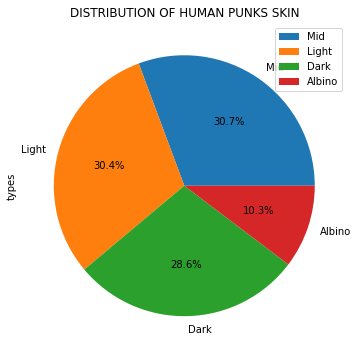

In [26]:
df_skin.plot.pie(y='types',figsize=(6,6),explode=(0,0,0,0), 
             autopct = '%2.1f%%',legend=True,title='DISTRIBUTION OF HUMAN PUNKS SKIN')
plt.show()

In [ ]:
# cuantos Albinos hay entre hombres y Mujeres

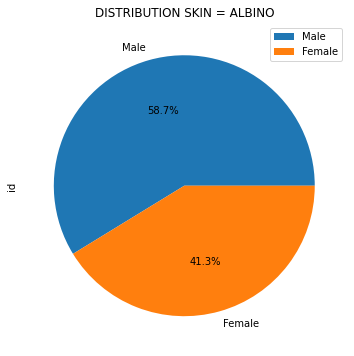

In [36]:
df_albinos = df_humans[df_humans.skin == 'Albino'].groupby('types').count().sort_values(by='id',ascending=False)
df_albinos.plot.pie(y='id',figsize=(6,6),explode=(0,0), 
             autopct = '%2.1f%%',legend=True,title='DISTRIBUTION SKIN = ALBINO')
plt.show()

In [ ]:
# analizar punks en funcion de la rareza

In [39]:
df_punks_raros = df1.iloc[df1.rarity.sort_values().index]
df_punks_raros.head()

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
8348,8348,Male,1,Mid,7,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",0,
6487,6487,Female,2,Albino,0,,0,
3307,3307,Male,3,Albino,0,,0,
2204,2204,Female,4,Dark,0,,0,
741,741,Male,5,Dark,0,,0,


In [273]:
df_top_punks_raros = df_punks_raros.reset_index(drop=True)[['id','rarity','types','skin','total_traits','total_hidden_traits','traits','hidden_traits']][:100]
df_top_punks_raros.head()

,id,rarity,types,skin,total_traits,total_hidden_traits,traits,hidden_traits
0,8348,1,Male,Mid,7,0,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",
1,6487,2,Female,Albino,0,0,,
2,3307,3,Male,Albino,0,0,,
3,2204,4,Female,Dark,0,0,,
4,741,5,Male,Dark,0,0,,


In [274]:
df_top_types = df_top_punks_raros.groupby('types').count().sort_values(by='total_traits',ascending=False)


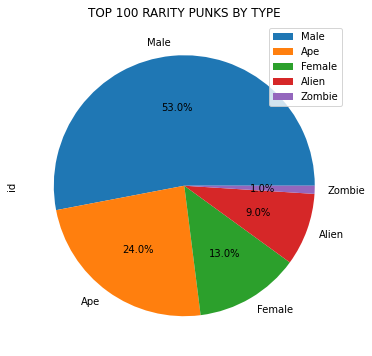

In [275]:
df_top_types.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',legend=True,title='TOP 100 RARITY PUNKS BY TYPE')
plt.show()

In [276]:
df_top_skin = df_top_punks_raros.groupby('skin').count().sort_values(by='total_traits',ascending=False)


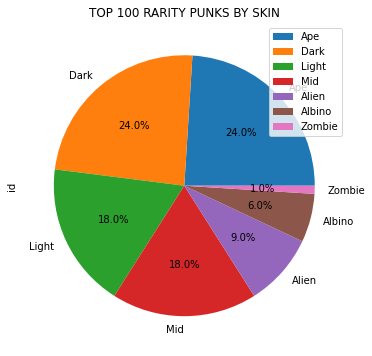

In [277]:
df_top_skin.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',legend=True,title='TOP 100 RARITY PUNKS BY SKIN')

plt.show()

In [278]:
# analisis en funcion de los traits

In [279]:
df_top_punks_raros

,id,rarity,types,skin,total_traits,total_hidden_traits,traits,hidden_traits
0,8348,1,Male,Mid,7,0,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",
1,6487,2,Female,Albino,0,0,,
2,3307,3,Male,Albino,0,0,,
3,2204,4,Female,Dark,0,0,,
4,741,5,Male,Dark,0,0,,
...,...,...,...,...,...,...,...,...
95,8562,96,Male,Dark,2,0,"Beanie,Earring",
96,6472,97,Male,Light,2,0,"Beanie,Earring",
97,5684,98,Female,Dark,2,0,"Choker,Pilot Helmet",
98,5787,99,Female,Mid,4,0,"Black Lipstick,Choker,Purple Eye Shadow,Tiara",


In [280]:
tipos = {'Male':'human',
         'Female':'human',
         'Alien': 'rest',
         'Zombie':'rest',
         'Ape': 'rest'
        }


In [281]:
df_top_punks_raros['tipos']= df_top_punks_raros.types.map(tipos)

In [282]:
df_humanos = df_top_punks_raros[df_top_punks_raros.tipos == 'human']
df_rest = df_top_punks_raros[df_top_punks_raros.tipos == 'rest']

In [283]:
df_traits_h = df_humanos.groupby('total_traits').count().sort_values(by='id',ascending=False)
df_traits_h

,id,rarity,types,skin,total_hidden_traits,traits,hidden_traits,tipos
total_traits,,,,,,,,
2,24,24,24,24,24,24,24,24
3,15,15,15,15,15,15,15,15
6,11,11,11,11,11,11,11,11
0,8,8,8,8,8,8,8,8
4,4,4,4,4,4,4,4,4
1,3,3,3,3,3,3,3,3
7,1,1,1,1,1,1,1,1


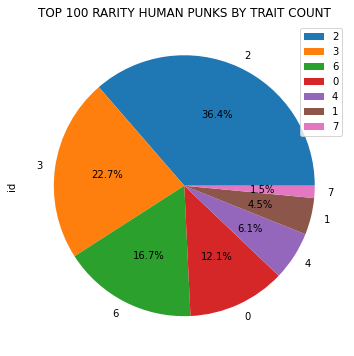

In [284]:
df_traits_h.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',legend=True,title='TOP 100 RARITY HUMAN PUNKS BY TRAIT COUNT')

plt.show()

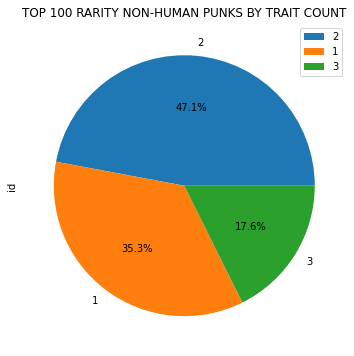

In [285]:
df_traits_rest = df_rest.groupby('total_traits').count().sort_values(by='id',ascending=False)
df_traits_rest.plot.pie(y='id',figsize=(6,6), 
             autopct = '%2.1f%%',legend=True,title='TOP 100 RARITY NON-HUMAN PUNKS BY TRAIT COUNT')

plt.show()

In [286]:
# cuantos punks tienen 7 atributos?
df_top_raros[df_top_raros.total_traits == 7]

,id,rarity,types,skin,total_traits,total_hidden_traits
0,8348,1,Male,Mid,7,0


In [287]:
# cuantos punks tienen 3 atributos ocultos?
df_top_raros[df_top_raros.total_hidden_traits == 3]

,id,rarity,types,skin,total_traits,total_hidden_traits
25,5949,26,Female,Dark,6,3


In [288]:
# analizamos por el atributo en particular 

In [289]:
df_top_punks_raros

,id,rarity,types,skin,total_traits,total_hidden_traits,traits,hidden_traits,tipos
0,8348,1,Male,Mid,7,0,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",,human
1,6487,2,Female,Albino,0,0,,,human
2,3307,3,Male,Albino,0,0,,,human
3,2204,4,Female,Dark,0,0,,,human
4,741,5,Male,Dark,0,0,,,human
...,...,...,...,...,...,...,...,...,...
95,8562,96,Male,Dark,2,0,"Beanie,Earring",,human
96,6472,97,Male,Light,2,0,"Beanie,Earring",,human
97,5684,98,Female,Dark,2,0,"Choker,Pilot Helmet",,human
98,5787,99,Female,Mid,4,0,"Black Lipstick,Choker,Purple Eye Shadow,Tiara",,human


In [292]:
df2 =df_top_punks_raros[['rarity','tipos','traits','types','hidden_traits']]
df2.head(10)

,rarity,tipos,traits,types,hidden_traits
0,1,human,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",Male,
1,2,human,,Female,
2,3,human,,Male,
3,4,human,,Female,
4,5,human,,Male,
5,6,human,,Female,
6,7,human,,Male,
7,8,human,,Female,
8,9,human,,Male,
9,10,rest,"Cowboy Hat,Earring",Alien,


In [293]:
# analysis por el tipo de trait
df2.traits

0     Big Beard,Buck Teeth,Cigarette,Classic Shades,...
1                                                      
2                                                      
3                                                      
4                                                      
                            ...                        
95                                       Beanie,Earring
96                                       Beanie,Earring
97                                  Choker,Pilot Helmet
98        Black Lipstick,Choker,Purple Eye Shadow,Tiara
99                                   Choker,Orange Side
Name: traits, Length: 100, dtype: object

In [294]:
#get traits 
def get_traits(dataframe,column):
    traits ={}
    for items in dataframe[column].str.split(','):
        for elem in items:        
            if len(elem) ==0:
                #print(type(elem))
                continue            
            if elem in traits:
                #print('exists, add one')
                traits[elem] += 1
            else:
                #print('not exist, create set to one ')
                traits[elem] = 1
    return traits
    

In [295]:
df_humans = df2[df2.tipos == 'human']
df_rest = df2[df2.tipos == 'rest']


In [313]:
df_rest.hidden_traits.values

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
      dtype=object)

In [318]:
columna = 'traits'
traits_humans = get_traits(df_humans,columna)
traits_rest = get_traits(df_rest,columna)


In [319]:
order_human_traits = dict(sorted(traits_humans.items(),key= lambda x:x[1],reverse=True))
df_traits_humans = pd.DataFrame(list(order_human_traits.items()),columns = ['trait','occurences'])
#df_traits_humans[df_traits_humans.occurences > 1]

traits_top_humans = set (df_traits_humans.trait.values)
len(traits_top_humans),df_traits_humans.head()

(52,
                 trait  occurences
 0              Beanie          43
 1             Earring          22
 2           Cigarette           7
 3  Horned Rim Glasses           7
 4                Mole           6)

In [320]:
order_rest_traits = dict(sorted(traits_rest.items(),key= lambda x:x[1],reverse=True))
df_traits_rest = pd.DataFrame(list(order_rest_traits.items()),columns = ['trait','occurences'])
#df_traits_rest[df_traits_rest.occurences > 1]

traits_top_rest = set (df_traits_rest.trait.values)
len(traits_top_rest)

28

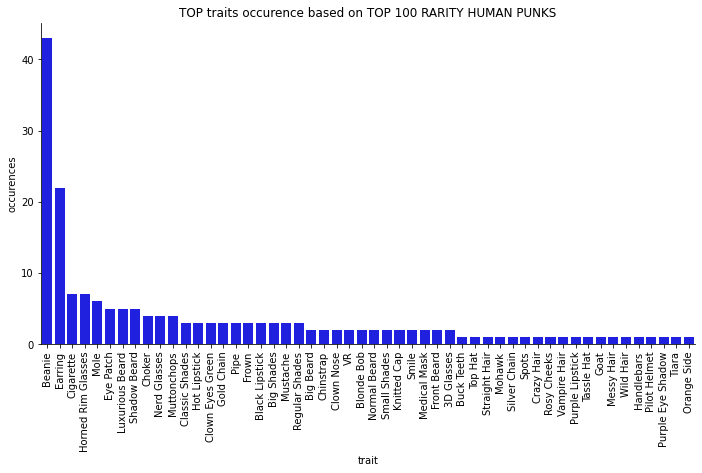

In [321]:
sns.catplot(x='trait',y='occurences',data= df_traits_humans,kind='bar',height=5, aspect=10/5,color='blue')
plt.title('TOP traits occurence based on TOP 100 RARITY HUMAN PUNKS')
plt.xticks(rotation=90)
plt.show()

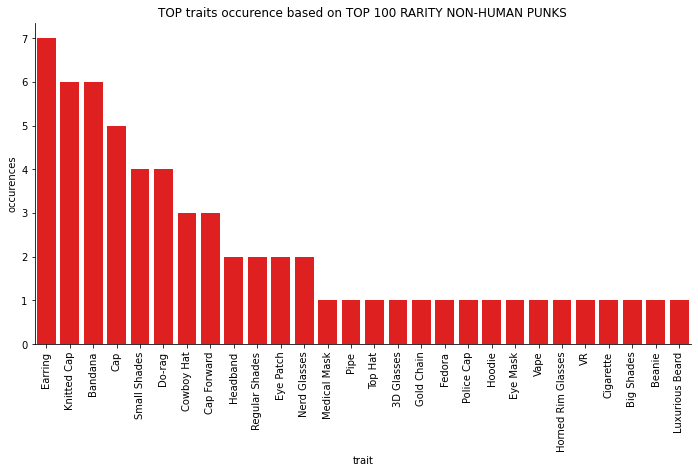

In [322]:
sns.catplot(x='trait',y='occurences',data= df_traits_rest,kind='bar',height=5, aspect=10/5,color='red')
plt.title('TOP traits occurence based on TOP 100 RARITY NON-HUMAN PUNKS')
plt.xticks(rotation=90)
plt.show()

In [243]:
traits_top_rest.intersection(traits_top_humans)

{'3D Glasses',
 'Beanie',
 'Big Shades',
 'Cigarette',
 'Earring',
 'Eye Patch',
 'Gold Chain',
 'Horned Rim Glasses',
 'Knitted Cap',
 'Luxurious Beard',
 'Medical Mask',
 'Nerd Glasses',
 'Pipe',
 'Regular Shades',
 'Small Shades',
 'Top Hat',
 'VR'}

In [222]:
traits_top_humans.union(traits_top_rest)

{'3D Glasses',
 'Bandana',
 'Beanie',
 'Big Beard',
 'Big Shades',
 'Black Lipstick',
 'Blonde Bob',
 'Buck Teeth',
 'Cap',
 'Cap Forward',
 'Chinstrap',
 'Choker',
 'Cigarette',
 'Classic Shades',
 'Clown Eyes Green',
 'Clown Nose',
 'Cowboy Hat',
 'Crazy Hair',
 'Do-rag',
 'Earring',
 'Eye Mask',
 'Eye Patch',
 'Fedora',
 'Front Beard',
 'Frown',
 'Goat',
 'Gold Chain',
 'Handlebars',
 'Headband',
 'Hoodie',
 'Horned Rim Glasses',
 'Hot Lipstick',
 'Knitted Cap',
 'Luxurious Beard',
 'Medical Mask',
 'Messy Hair',
 'Mohawk',
 'Mole',
 'Mustache',
 'Muttonchops',
 'Nerd Glasses',
 'Normal Beard',
 'Orange Side',
 'Pilot Helmet',
 'Pipe',
 'Police Cap',
 'Purple Eye Shadow',
 'Purple Lipstick',
 'Regular Shades',
 'Rosy Cheeks',
 'Shadow Beard',
 'Silver Chain',
 'Small Shades',
 'Smile',
 'Spots',
 'Straight Hair',
 'Tassle Hat',
 'Tiara',
 'Top Hat',
 'VR',
 'Vampire Hair',
 'Vape',
 'Wild Hair'}

In [104]:
most_common_all = set(data_top.trait.unique())

In [244]:
def get_traits():
    traits ={}
    for items in df1.traits.str.split(','):
        for elem in items:        
            if len(elem) ==0:
                #print(type(elem))
                continue            
            if elem in traits:
                #print('exists, add one')
                traits[elem] += 1
            else:
                #print('not exist, create set to one ')
                traits[elem] = 1
    return traits

traits = get_traits()
len(traits)

89

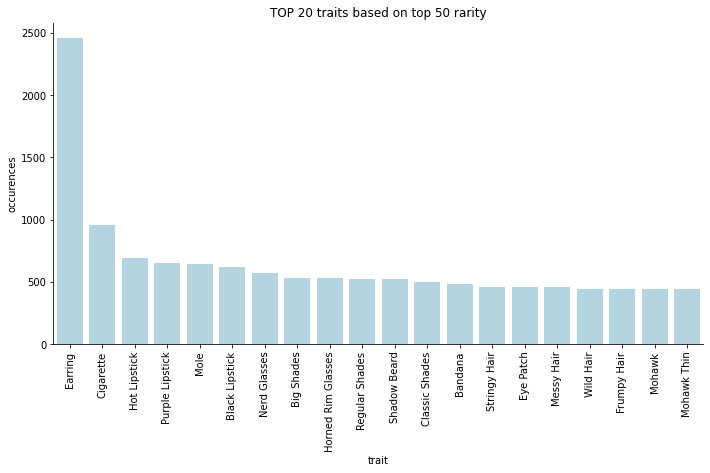

In [245]:

order_traits = dict(sorted(traits.items(),key= lambda x:x[1],reverse=True))
df_top_traits = pd.DataFrame(list(order_traits.items()),columns = ['trait','occurences']) [0:20]

sns.catplot(x='trait',y='occurences',data= df_top_traits,kind='bar',height=5, aspect=10/5,color='lightblue')
plt.title('TOP 20 traits based on top 50 rarity')
plt.xticks(rotation=90)
plt.show()

In [105]:
most_common_top = set(df_top_traits.trait.unique())

In [112]:
print(list(most_common_top -most_common_all))

['Medical Mask', 'Top Hat', 'Clown Nose', 'Headband', 'Knitted Cap', 'Gold Chain', 'Cap', 'Do-rag', 'Pipe', 'Cowboy Hat', 'Cap Forward', 'Small Shades']


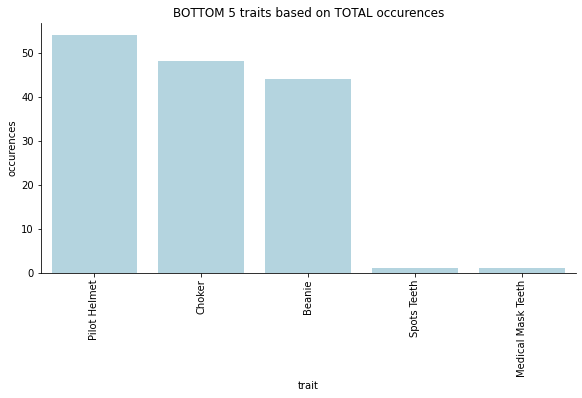

In [114]:
data_bottom = df_traits[-5:]
sns.catplot(x='trait',y='occurences',data= data_bottom,kind='bar',height=4, aspect=10/5,color='lightblue')
plt.title('BOTTOM 5 traits based on TOTAL occurences')
plt.xticks(rotation=90)
plt.show()

In [30]:
df1[df1.skin == 'Albino'].sort_values('rarity')

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
6487,6487,Female,2,Albino,0,,0,
3307,3307,Male,3,Albino,0,,0,
755,755,Female,24,Albino,6,"Black Lipstick,Blonde Bob,Cigarette,Clown Eyes...",1,Earring
5056,5056,Male,64,Albino,4,"Beanie,Earring,Luxurious Beard,VR",0,
8958,8958,Male,83,Albino,3,"Beanie,Horned Rim Glasses,Shadow Beard",0,
...,...,...,...,...,...,...,...,...
233,233,Female,9978,Albino,2,"Bandana,Hot Lipstick",0,
2638,2638,Female,9984,Albino,2,"Bandana,Cigarette",0,
6516,6516,Male,9985,Albino,2,"Bandana,Cigarette",0,
2714,2714,Female,9993,Albino,2,"Bandana,Earring",0,


skin,Albino,Alien,Ape,Dark,Light,Mid,Zombie
types,,,,,,,
Alien,NaN,1.888889,NaN,NaN,NaN,NaN,NaN
Ape,NaN,NaN,1.75,NaN,NaN,NaN,NaN
Female,2.559524,NaN,NaN,2.739328,2.731878,2.778535,NaN
Male,2.575251,NaN,NaN,2.782937,2.804944,2.823910,NaN
Zombie,NaN,NaN,NaN,NaN,NaN,NaN,2.272727


In [63]:
df_heat = pd.crosstab(index=df1.types,columns=df1.skin,values=df1.rarity,aggfunc=np.mean,dropna=True,normalize=True)

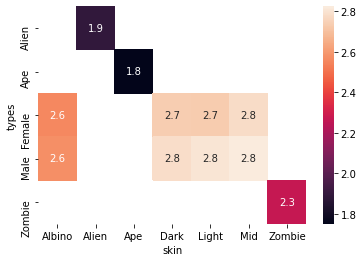

In [64]:

sns.heatmap(df_heatmap,annot=True)
plt.show()

In [65]:
df1.corr()

,id,rarity,total_traits,total_hidden_traits
id,1.000000,-0.080418,0.216370,-0.005077
rarity,-0.080418,1.000000,-0.078608,-0.163857
total_traits,0.216370,-0.078608,1.000000,0.286896
total_hidden_traits,-0.005077,-0.163857,0.286896,1.000000
